<h2>2015 flight delays and cancellations</h2>

In [1]:
#importing all the relevant libraries  here
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
%matplotlib inline
flight = pd.read_csv('C:/Users/deepd/Downloads/Regression-Model-Flight-Dataset/flights.csv')

In [2]:
#top 5 rows of the dataset
flight.head(5)

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
0,2015,1,1,4,EV,4160,N11150,JAX,EWR,540,...,743.0,-14.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
1,2015,1,1,4,AA,1635,N025AA,ATL,DFW,625,...,NaN,NaN,0,1,B,NaN,NaN,NaN,NaN,NaN
2,2015,1,1,4,WN,119,N271LV,RSW,ATL,800,...,934.0,-11.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
3,2015,1,1,4,EV,4936,N738EV,MSP,IAD,900,...,1240.0,12.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,2015,1,1,4,DL,2319,N960DL,LGA,MSP,1010,...,1225.0,-5.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
#bottom 5 rows of the dataset
flight.tail()

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
5816,2015,12,31,4,UA,436,N69838,IAD,TPA,1230,...,1448.0,-12.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
5817,2015,12,31,4,WN,2265,N626SW,TUL,LAS,1345,...,1523.0,38.0,0,0,NaN,0.0,0.0,8.0,30.0,0.0
5818,2015,12,31,4,MQ,3083,N513MQ,STL,ORD,1358,...,1525.0,2.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
5819,2015,12,31,4,EV,2775,N624AE,SPI,DFW,1411,...,1605.0,-22.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
5820,2015,12,31,4,WN,3479,N719SW,CMH,PHX,1450,...,1734.0,19.0,0,0,NaN,19.0,0.0,0.0,0.0,0.0


In [4]:
#Number of observations
print("Total No. of observations : {}".format(len(flight)))

Total No. of observations : 5821


In [5]:
#The number of feature/columns
print("Total No. of features : {}".format(len(flight.columns)))

Total No. of features : 31


In [6]:
#Name of columns
for col in flight.columns:
    print(col)

YEAR
MONTH
DAY
DAY_OF_WEEK
AIRLINE
FLIGHT_NUMBER
TAIL_NUMBER
ORIGIN_AIRPORT
DESTINATION_AIRPORT
SCHEDULED_DEPARTURE
DEPARTURE_TIME
DEPARTURE_DELAY
TAXI_OUT
WHEELS_OFF
SCHEDULED_TIME
ELAPSED_TIME
AIR_TIME
DISTANCE
WHEELS_ON
TAXI_IN
SCHEDULED_ARRIVAL
ARRIVAL_TIME
ARRIVAL_DELAY
DIVERTED
CANCELLED
CANCELLATION_REASON
AIR_SYSTEM_DELAY
SECURITY_DELAY
AIRLINE_DELAY
LATE_AIRCRAFT_DELAY
WEATHER_DELAY


In [7]:
#Information about the columns, types and the not null values
flight.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5821 entries, 0 to 5820
Data columns (total 31 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   YEAR                 5821 non-null   int64  
 1   MONTH                5821 non-null   int64  
 2   DAY                  5821 non-null   int64  
 3   DAY_OF_WEEK          5821 non-null   int64  
 4   AIRLINE              5821 non-null   object 
 5   FLIGHT_NUMBER        5821 non-null   int64  
 6   TAIL_NUMBER          5805 non-null   object 
 7   ORIGIN_AIRPORT       5821 non-null   object 
 8   DESTINATION_AIRPORT  5821 non-null   object 
 9   SCHEDULED_DEPARTURE  5821 non-null   int64  
 10  DEPARTURE_TIME       5730 non-null   float64
 11  DEPARTURE_DELAY      5730 non-null   float64
 12  TAXI_OUT             5728 non-null   float64
 13  WHEELS_OFF           5728 non-null   float64
 14  SCHEDULED_TIME       5821 non-null   int64  
 15  ELAPSED_TIME         5713 non-null   f

In [8]:
#missing value in departure and arrival delays
print("The missing values in departure delays : {}".format(flight['DEPARTURE_DELAY'].isnull().sum()))
print("The missing values in Arrival delays {}".format(flight['ARRIVAL_DELAY'].isnull().sum()))

The missing values in departure delays : 91
The missing values in Arrival delays 108


In [9]:
#Top 10 values where the arrival and departure delays are missing
flight[(flight['ARRIVAL_DELAY'].isnull()) | (flight['DEPARTURE_DELAY'].isnull()) ][['ARRIVAL_DELAY','ARRIVAL_TIME','DEPARTURE_DELAY','DEPARTURE_TIME']].head(10)

,ARRIVAL_DELAY,ARRIVAL_TIME,DEPARTURE_DELAY,DEPARTURE_TIME
1,NaN,NaN,NaN,NaN
10,NaN,NaN,NaN,NaN
47,NaN,NaN,NaN,NaN
115,NaN,NaN,NaN,NaN
116,NaN,NaN,NaN,NaN
172,NaN,NaN,NaN,NaN
174,NaN,NaN,NaN,NaN
190,NaN,NaN,NaN,NaN
350,NaN,NaN,31.0,1221.0
359,NaN,NaN,NaN,NaN


In [10]:
#Dropping the null values in departure and arrival delay
flight.dropna(subset=['DEPARTURE_DELAY','ARRIVAL_DELAY'],inplace=True)

In [11]:
#Total number of observations after dropping the null values of departure and arrival delay
len(flight)

5713

In [12]:
#The current number of missing values i departure and arrival delays
print("The missing value in departure delays: {}".format(flight['DEPARTURE_DELAY'].isnull().sum()))
print("The missing value in arrival delays: {}".format(flight['ARRIVAL_DELAY'].isnull().sum()))

The missing value in departure delays: 0
The missing value in arrival delays: 0


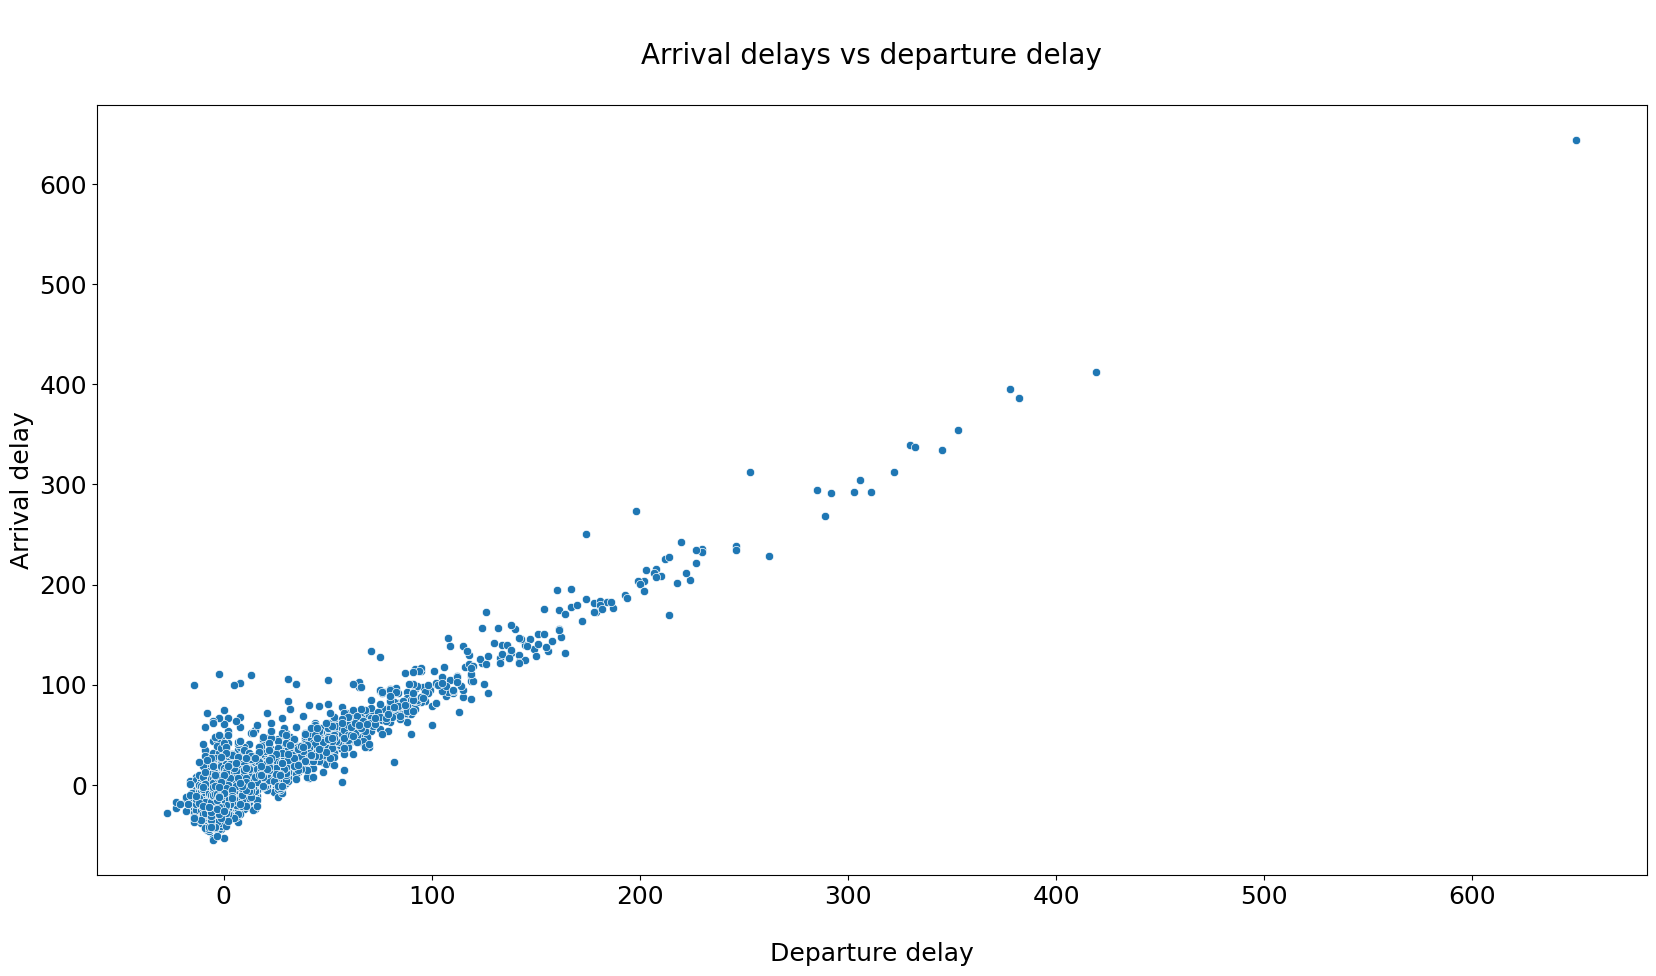

In [14]:
#scatter plot betwwen arrival and department delay
plt.figure(figsize=(20,10))
sns.scatterplot(x="DEPARTURE_DELAY",y="ARRIVAL_DELAY",data=flight)
plt.xlabel("\nDeparture delay",fontsize=18)
plt.ylabel("Arrival delay",fontsize=18)
plt.title("\nArrival delays vs departure delay\n",fontsize=20)
plt.tick_params(labelsize=18)
plt.show()

In [16]:
#mean and median of arrival and departure delay
print("Average departure delay : {}".format(flight['DEPARTURE_DELAY'].mean()))
print("Median departure delay : {} " .format(flight['DEPARTURE_DELAY'].median()))
print("Average arrival delay : {} " .format(flight['ARRIVAL_DELAY'].mean()))
print("Median arrival delay : {} " .format(flight['ARRIVAL_DELAY'].median()))

Average departure delay : 8.886574479257833
Median departure delay : -2.0 
Average arrival delay : 3.9882723612812883 
Median arrival delay : -5.0 
